In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1

from pytamp.action.pick import PickAction
from pytamp.action.rearrangement import RearrangementAction

from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pykin.utils.kin_utils import ShellColors as sc


def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=150, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=20, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-d609ff00-7ba1-49c5-badc-eea71257d64c.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]),
                           Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
                           Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]),
                           Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]),
                           Object(name=cereal0, pos=[0.4

3001
6001
9001
12001
15001
18001
18001


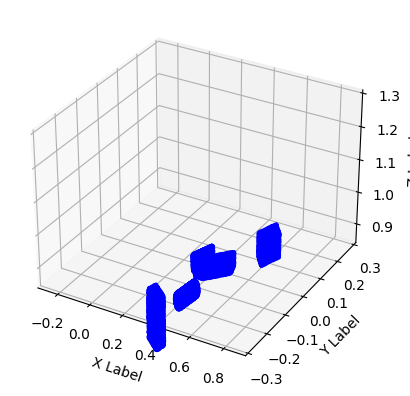

In [24]:
%matplotlib inline
import trimesh
from trimesh.util import concatenate

point_clouds = trimesh.PointCloud(np.zeros((1,3))).vertices
for name,i in rearrangement1.scene_mngr.scene.objs.items():
    
    # random sampling으로 mesh 위 point cloud 일부 가져오기 
    points = i.gparam.sample(3000)
    point_clouds = np.vstack([point_clouds, points])
    print(len(point_clouds))
# points = mesh.sample(10000, surface_points=True)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(point_clouds))

# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_clouds[:, 0], point_clouds[:, 1], point_clouds[:, 2], c='b', marker='.')
ax.set_xlim(-.3,.9)
ax.set_ylim(-.3,.3)
ax.set_zlim(0.85,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [22]:
rearrangement1.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]),
 'can0': Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
 'can1': Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]),
 'milk0': Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]),
 'cereal0': Object(name=cereal0, pos=[0.43695543 0.12948806 0.88526188])}

In [ ]:
point_clouds

In [14]:
can_mesh.center_mass, cereal_mesh.center_mass

(array([ 0.44086927, -0.03354331,  0.87809554]),
 array([0.29896214, 0.01771398, 0.85059666]))

In [57]:
point_clouds = trimesh.PointCloud(np.zeros((1,3))).vertices

concatenate(point_clouds)

ValueError: Unable to extract class of name Trimesh

In [26]:
import numpy as np
from trimesh.util import concatenate

# 비어있는 TrackedArray 생성
tracked_arr = concatenate([])
tracked_arr

[]

In [133]:
matrix = np.eye(4).reshape(1, 4, 4) * np.ones((10000, 1, 1))
matrix[:,:3,-1] = points

In [141]:
can_point_cloud_in_scene = can.h_mat @ matrix

In [143]:
np.where(can_point_cloud_in_scene[:,2,3])

(array([   0,    1,    2, ..., 9997, 9998, 9999]),)

In [145]:
support_polys, support_T , sup_obj_name= rearrangement1.init_scene._get_support_polygons()
support_index = max(enumerate(support_polys), key=lambda x: x[1].area)[0]


support_polys[support_index].centroid.x, support_polys[support_index].centroid.y 

table_center = support_T[support_index][:3,3]

In [171]:
rearrangement1.scene_mngr.scene.objs['can0'].gparam.center_mass

array([5.55561743e-09, 1.07922916e-08, 9.06032271e-09])

In [176]:
from copy import deepcopy
obj_name = 'can0'
copied_mesh = rearrangement1.scene_mngr.scene.objs[obj_name].gparam
copied_mesh.apply_translation(-copied_mesh.center_mass)
copied_mesh.apply_transform(rearrangement1.scene_mngr.scene.objs[obj_name].h_mat)

copied_mesh.sample(100)

TrackedArray([[ 0.41946963,  0.02725972,  0.81103323],
              [ 0.40088323,  0.04788476,  0.83349189],
              [ 0.38965373, -0.00497945,  0.85987223],
              [ 0.3944567 , -0.03766178,  0.83283635],
              [ 0.40483131, -0.01615992,  0.81726176],
              [ 0.38258589,  0.02394446,  0.82590808],
              [ 0.39890045, -0.01984092,  0.85548574],
              [ 0.40507221,  0.01745926,  0.81029998],
              [ 0.43843453,  0.02212502,  0.83859324],
              [ 0.42005985,  0.03198486,  0.85969224],
              [ 0.36517251, -0.01425586,  0.8171664 ],
              [ 0.40400739,  0.04676585,  0.85037547],
              [ 0.36444992, -0.01831171,  0.84927772],
              [ 0.4017177 ,  0.04475045,  0.83462083],
              [ 0.41318636,  0.03735481,  0.83456153],
              [ 0.4337181 ,  0.02703328,  0.82226535],
              [ 0.4317417 ,  0.02538928,  0.82989973],
              [ 0.38206844,  0.02356586,  0.82676531],
          

In [178]:
rearrangement1.scene_mngr.scene.objs[obj_name].gparam.center_mass

array([0.39698325, 0.00357495, 0.83501823])